In [2]:
!pip install inference

  Using cached inference-0.23.0-py3-none-any.whl.metadata (14 kB)
  Using cached aiortc-1.9.0-cp38-abi3-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached APScheduler-3.10.1-py3-none-any.whl.metadata (5.7 kB)
  Using cached Cython-3.0.0-py2.py3-none-any.whl.metadata (3.1 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached fastapi-0.110.3-py3-none-any.whl.metadata (24 kB)
  Using cached piexif-1.1.3-py2.py3-none-any.whl.metadata (3.7 kB)
  Using cached pillow-10.4.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached prometheus_fastapi_instrumentator-6.0.0-py3-none-any.whl.metadata (13 kB)
  Using cached redis-5.1.1-py3-none-any.whl.metadata (9.1 kB)
  Using cached rich-13.5.2-py3-none-any.whl.metadata (18 kB)
  Using cached supervision-0.22.0-py3-none-any.whl.metadata (13 kB)
  Using cached pybase64-1.4.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (8.1 kB)
  Using cached scikit_image-0.24.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (14 

In [ ]:
from inference_sdk import InferenceHTTPClient

# create an inference client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="uGu8WU7fJgR8qflCGaqP"
)



In [ ]:
# run inference on a local image
print(CLIENT.infer(
    "example.jpg",
    model_id="top-camera-detection-r4fqs/2"
))

{'inference_id': '18fc0462-b8e8-441f-be08-3eacb1bb5ce4', 'time': 0.10700991000021531, 'image': {'width': 640, 'height': 480}, 'predictions': [{'x': 280.5, 'y': 147.5, 'width': 123.0, 'height': 161.0, 'confidence': 0.9688553810119629, 'class': 'red-box', 'points': [{'x': 219.0, 'y': 67.5}, {'x': 219.0, 'y': 228.0}, {'x': 342.0, 'y': 228.0}, {'x': 342.0, 'y': 67.5}], 'class_id': 2, 'detection_id': '49b000cf-241d-42ff-867f-34834df0700b'}]}


In [3]:
import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile
import cv2
import supervision as sv

image = cv2.imread('snapshot.jpeg')

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# from inference import get_model

model = get_model(model_id="robot_camera_detector/1", api_key="uGu8WU7fJgR8qflCGaqP")

results = model.infer("example.jpg")[0]

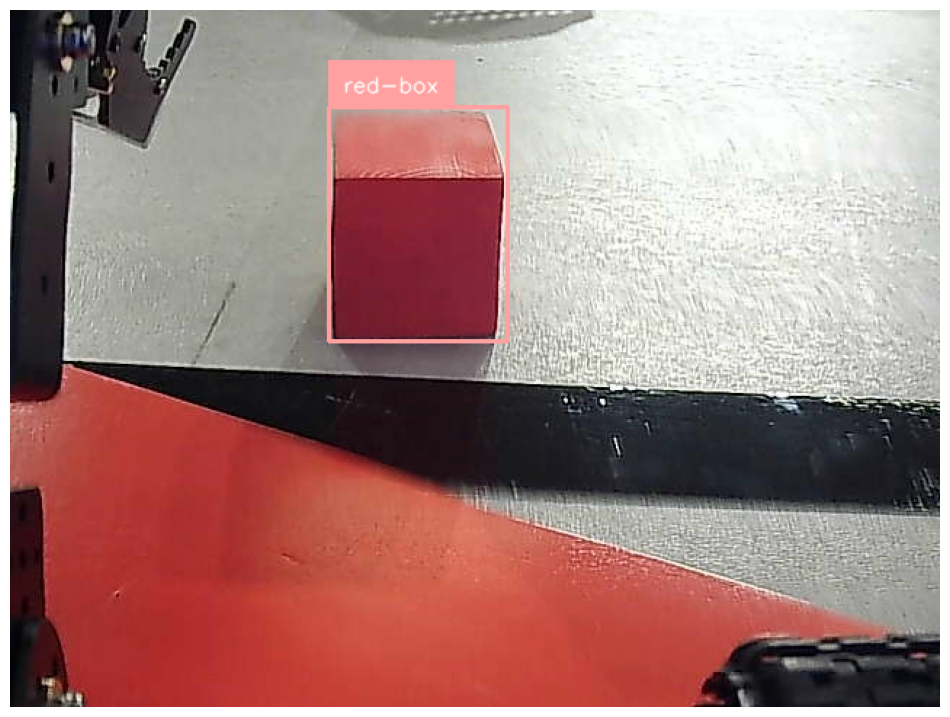

In [ ]:
# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)